<a href="https://colab.research.google.com/github/Stivaly/Stivaly/blob/main/Predicci%C3%B3n_de_inmuebles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bienvenido a mi primer proyecto con Python

Dataset 1: Valor Casas Usadas, Chile, RM, 18/07/2023

link: https://www.kaggle.com/datasets/luisfelipetn/valor-casas-usadas-chile-rm-08032023

Dataset 2: Presupuestos familiares

Link: https://www.ine.gob.cl/estadisticas/sociales/ingresos-y-gastos/encuesta-de-presupuestos-familiares


In [1]:
from google.colab import drive

# Esto montará Google Drive en la carpeta '/content/drive/'
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import pandas as pd

#Asignamos variable a cada una de las tablas
web = pd.read_csv('/content/drive/MyDrive/Inmersión Datos Alura/Propiedades Web Scrape.csv')
economia = pd.read_csv('/content/drive/MyDrive/Inmersión Datos Alura/base-personas-viii-epf-(formato-csv)(1).csv', sep = ';')

<ipython-input-2-8f5d7fffbf64>:5: DtypeWarning: Columns (106,107,120,121,122,123,130,131,139,140,141,143,144,163,165,175,178,179,181,195,196,197,199,204,206,209,211,212,215,222,224,228,238,241,242,244) have mixed types. Specify dtype option on import or set low_memory=False.
  economia = pd.read_csv('/content/drive/MyDrive/Inmersión Datos Alura/base-personas-viii-epf-(formato-csv)(1).csv', sep = ';')


Con la siguiente linea eliminamos quien publicó estos inmuebles, ya que en muchos casos son personas, para proteger su privacidad realizo este paso, el cual elimina la columna de los resultados dentro del notebook pero no modifica el dataset original.

In [3]:
web.drop('Realtor', axis=1, inplace=True)

In [4]:
web.head()

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id
0,129884400,3600.0,158396.0,Lampa,AvenidaLaHacienda,3.0,2.0,68.0,221.0,1.0,7850612
1,130000000,3603.0,158537.0,Buin,Villaseca,5.0,3.0,150.0,190.0,2.0,10081485
2,172998805,4795.0,210974.0,PuenteAlto,BarrioAustria,4.0,3.0,90.0,182.0,3.0,10257247
3,135296250,3750.0,164995.0,Buin,ComercianteArmandoPérezCarrasco,3.0,2.0,85.0,175.0,1.0,20153043
4,195000000,5405.0,237805.0,QuintaNormal,Hostos,3.0,3.0,130.0,402.0,1.0,16669338


# Data Cleaning
Iniciamos acá nuestro proceso de limpieza de datos donde estaremos explorando nuestro data set y dandole forma para poder procesarlos y realizar analisis

In [5]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   9291 non-null   int64  
 1   Price_UF    9291 non-null   float64
 2   Price_USD   9291 non-null   float64
 3   Comuna      9291 non-null   object 
 4   Ubicacion   9291 non-null   object 
 5   Dorms       9202 non-null   float64
 6   Baths       9138 non-null   float64
 7   Built Area  9013 non-null   float64
 8   Total Area  9057 non-null   float64
 9   Parking     6371 non-null   float64
 10  id          9291 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 798.6+ KB


*A continuación realizamos el formato de la variable price_clp, price_uf y price_clp de entero a flotante y realizamos disminución de ceros para su legibilidad.* ✅

In [6]:
web.describe()

,Price_CLP,Price_UF,Price_USD,Dorms,Baths,Built Area,Total Area,Parking,id
count,9.291000e+03,9291.000000,9.291000e+03,9202.000000,9138.000000,9.013000e+03,9057.000000,6371.000000,9.291000e+03
mean,3.925134e+08,10879.276827,4.786749e+05,4.027059,2.749726,6.091603e+03,890.977145,2.682467,1.411157e+07
std,4.036515e+08,11187.989790,4.922579e+05,1.661439,1.478629,5.274367e+05,11291.403141,2.221227,4.187239e+06
min,3.700000e+07,1026.000000,4.512200e+04,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.213620e+06
25%,1.282067e+08,3553.500000,1.563500e+05,3.000000,2.000000,9.000000e+01,134.000000,1.000000,1.108746e+07
50%,2.345135e+08,6500.000000,2.859920e+05,4.000000,3.000000,1.310000e+02,230.000000,2.000000,1.443683e+07
75%,5.267534e+08,14600.000000,6.423820e+05,5.000000,3.000000,2.090000e+02,480.000000,3.000000,1.784428e+07
max,4.870665e+09,135000.000000,5.939835e+06,35.000000,29.000000,5.000000e+07,720000.000000,26.000000,2.016146e+07


In [7]:
web['precio_millon_clp'] = web.Price_CLP.astype('float')/1000000
web['precio_mil_uf'] = web.Price_UF.astype('float')/1000
web['precio_mil_usd'] = web.Price_USD.astype('float')/1000
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data_casas = web[['Comuna', 'precio_millon_clp', 'precio_mil_uf', 'precio_mil_usd']]
data_casas[['banos', 'dormitorios', 'area_construida', 'area_total']] = web[['Baths', 'Dorms', 'Built Area', 'Total Area']]
data_casas

<ipython-input-7-8f15f0cbcbe0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_casas[['banos', 'dormitorios', 'area_construida', 'area_total']] = web[['Baths', 'Dorms', 'Built Area', 'Total Area']]
<ipython-input-7-8f15f0cbcbe0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_casas[['banos', 'dormitorios', 'area_construida', 'area_total']] = web[['Baths', 'Dorms', 'Built Area', 'Total Area']]
<ipython-input-7-8f15f0cbcbe0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,Comuna,precio_millon_clp,precio_mil_uf,precio_mil_usd,banos,dormitorios,area_construida,area_total
0,Lampa,129.88,3.60,158.40,2.00,3.00,68.00,221.00
1,Buin,130.00,3.60,158.54,3.00,5.00,150.00,190.00
2,PuenteAlto,173.00,4.79,210.97,3.00,4.00,90.00,182.00
3,Buin,135.30,3.75,165.00,2.00,3.00,85.00,175.00
4,QuintaNormal,195.00,5.41,237.81,3.00,3.00,130.00,402.00
...,...,...,...,...,...,...,...,...
9286,PuenteAlto,80.00,2.22,97.56,1.00,2.00,75.00,100.00
9287,PuenteAlto,250.00,6.93,304.88,2.00,4.00,196.00,750.00
9288,LasCondes,3788.30,105.00,4619.87,7.00,5.00,460.00,4925.00
9289,LaPintana,577.26,16.00,703.98,2.00,4.00,311.00,2011.00


En esta etapa, estamos verificando los valores que se encuentran dentro del data set, donde verificamos algunos datos fuera de lo normal, como un inmueble con un area total de 678000 u otro con un area total de 1 metro. Realizaremos exploración para verificar cuantos de estos datos se repiten y los excluiremos del estudio.

*Nota: En caso de estar con un cliente, estos datos se aislan temporalmente del dataset hasta que el cliente decida que debe hacerse con ellos.*

In [8]:
max_total_area = data_casas['area_total'].max()
min_total_area = data_casas['area_total'].min()
# Contar la frecuencia de cada valor único en la columna 'A'
repeticion_max_min = data_casas['area_total'].value_counts()

# Obtener el número de veces que se repite el valor máximo y mínimo
count_max = repeticion_max_min[max_total_area]
count_min = repeticion_max_min[min_total_area]
print(f"El valor máximo es {max_total_area} y aparece {count_max} veces.")
print(f"El valor mínimo es {min_total_area} y aparece {count_min} veces.")

El valor máximo es 720000.0 y aparece 1 veces.
El valor mínimo es 1.0 y aparece 3 veces.


Realizamos en este paso la limpieza de estos valores

In [9]:
data_casas = data_casas.query("area_total != 1 & area_construida != 1")

In [10]:
data_casas.describe()

,precio_millon_clp,precio_mil_uf,precio_mil_usd,banos,dormitorios,area_construida,area_total
count,9284.00,9284.00,9284.00,9132.00,9195.00,9006.00,9050.00
mean,392.62,10.88,478.80,2.75,4.03,6096.27,891.57
std,403.77,11.19,492.40,1.48,1.66,527641.61,11295.75
min,37.00,1.03,45.12,1.00,1.00,7.00,8.00
25%,128.23,3.55,156.38,2.00,3.00,90.00,134.25
50%,234.51,6.50,285.99,3.00,4.00,131.00,230.00
75%,526.75,14.60,642.38,3.00,5.00,209.00,480.00
max,4870.66,135.00,5939.84,29.00,35.00,50000000.00,720000.00


In [11]:
economia.shape

(48308, 247)

In [12]:
economia = economia.query('ZONA == 1')
economia

,ZONA,FOLIO_V,FOLIO,FE,VARSTRAT,VARUNIT,PERSONA,N_LINEA,NPERSONAS,JHOGAR,...,TE01,TE02,TE03,TE04,TE05,TE06,TE07,TE08,TE09,TE10_HOG
0,1,1,00001-1,"295,481873557148",56,418,1,1,4,1,...,2,-77,2,-77,-77,-77,2,-77,2,-77
1,1,1,00001-1,"295,481873557148",56,418,2,2,4,0,...,2,-77,2,-77,-77,-77,2,-77,2,-77
2,1,1,00001-1,"295,481873557148",56,418,3,3,4,0,...,2,-77,2,-77,-77,-77,2,-77,2,-77
3,1,1,00001-1,"295,481873557148",56,418,4,4,4,0,...,-77,-77,-77,-77,-77,-77,-77,-77,-77,-77
5,1,3,00003-1,"229,616767815941",36,228,1,1,5,1,...,2,-77,2,-77,-77,-77,2,-77,2,-77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48295,1,14997,14997-1,"102,80748662549",45,394,1,1,5,1,...,2,-77,2,-77,-77,-77,2,-77,2,-77
48296,1,14997,14997-1,"102,80748662549",45,394,2,2,5,0,...,2,-77,2,-77,-77,-77,2,-77,2,-77
48297,1,14997,14997-1,"102,80748662549",45,394,3,3,5,0,...,2,-77,2,-77,-77,-77,2,-77,2,-77
48298,1,14997,14997-1,"102,80748662549",45,394,4,4,5,0,...,2,-77,2,-77,-77,-77,2,-77,2,-77


In [13]:
prueba = economia['VS05'].unique()
prueba

array(['NO APLICA', 'SAN VICENTE', 'NO SABE', 'ALGARROBO', 'VALPARAÍSO',
       'PICHILEMU', 'PAINE', 'VIÑA DEL MAR', 'EL QUISCO', 'PUCHUNCAVÍ',
       'COBQUECURA *', 'LOS ÁNGELES', 'LINARES', 'VILLARRICA',
       'MELIPILLA', 'PADRE HURTADO', 'CONCÓN', 'NO RESPONDE', 'QUINTERO',
       'RÍO CLARO', 'SAN FERNANDO', 'LOS VILOS', 'CARTAGENA', 'PAPUDO',
       'EL TABO', 'COQUIMBO', 'BUIN', 'PIRQUE', 'LA SERENA',
       'PROVIDENCIA', 'LONCOCHE', 'LA LIGUA', 'PUENTE ALTO', 'CASABLANCA',
       'QUINTA NORMAL', 'PARRAL', 'RÍO BUENO', 'CALAMA', 'SANTO DOMINGO',
       'PAREDONES', 'CHILLÁN *', 'CAUQUENES', 'LAS CABRAS', 'ZAPALLAR',
       'SANTA CRUZ', 'MOSTAZAL', 'PUTAENDO', 'PANGUIPULLI',
       'PUERTO MONTT', 'NAVIDAD', 'HIJUELAS', 'CURICÓ', 'LAS CONDES',
       'COLTAUCO', 'PUCÓN', 'RENCA', 'SANTA BÁRBARA', 'MELIPEUCO',
       'SANTIAGO', 'SAN ANTONIO', 'PINTO *', 'EXTRANJERO', 'QUILLÓN *',
       'PUYEHUE', 'VALDIVIA', 'IQUIQUE', 'SAN PEDRO DE LA PAZ',
       'CURACAVÍ', 'LOS MUERMOS

# Data Analysis

importamos las librerías matplotlib y seaborn para esta etapa

*Realizamos primero un conteo para verificar cuantos inmuebles hay a la venta por comuna, sorteamos decendente dando como resultado el top 5 de comunas con más inmuebles a la venta.*

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
conteo_comuna = data_casas['Comuna'].value_counts()

top5_casas = conteo_comuna.sort_values(ascending=False).head(5)

top5_frame = pd.DataFrame(top5_casas)
top5_frame

,Comuna
LasCondes,939
PuenteAlto,815
Maipú,736
Colina,693
LoBarnechea,577


*Primer gráfico a continuación donde tenemos el top 5 de comunas con mayor cantidad de inmuebles a la venta.*

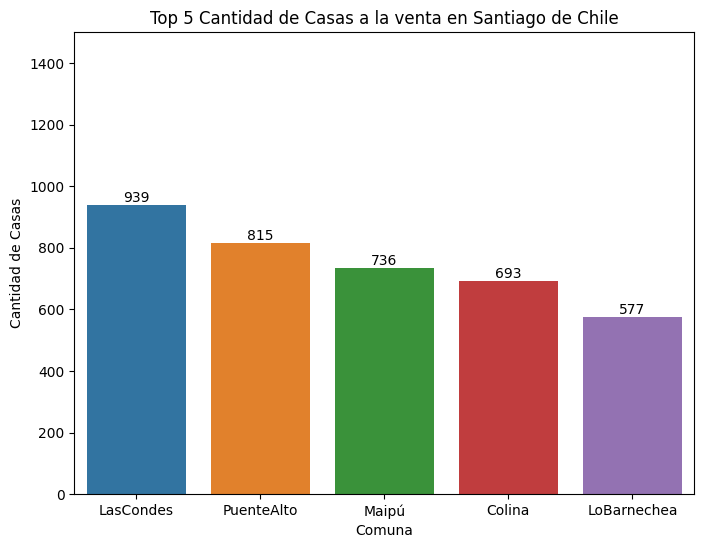

In [16]:
plt.figure(figsize=(8,6))
graphic = sns.barplot(x=top5_frame.index, y=top5_frame['Comuna'])
graphic.set_title('Top 5 Cantidad de Casas a la venta en Santiago de Chile')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Casas')
plt.ylim(0,1500)

for labels in graphic.patches:
    graphic.annotate(f'{int(labels.get_height())}', (labels.get_x() + labels.get_width() / 2., labels.get_height()),
                ha='center', va='bottom')

plt.show()

*Luego vamos a verificar los promedios de precios de las Casas en Santiago por comuna y ordenados de mayor a menor*

In [17]:
promedio_comuna = data_casas.groupby('Comuna')['precio_millon_clp'].sum()
promedio_comuna = promedio_comuna/len(data_casas.groupby('Comuna')['precio_millon_clp'])
promedio_comuna = pd.DataFrame(promedio_comuna.sort_values(ascending=False))
promedio_comuna.reset_index(inplace=True)
promedio_comuna.head()

,Comuna,precio_millon_clp
0,LasCondes,13932.07
1,LoBarnechea,11553.84
2,Colina,7022.31
3,Vitacura,5089.87
4,LaReina,3533.24


Realizamos la visualización de esta información con un gráfico de barras

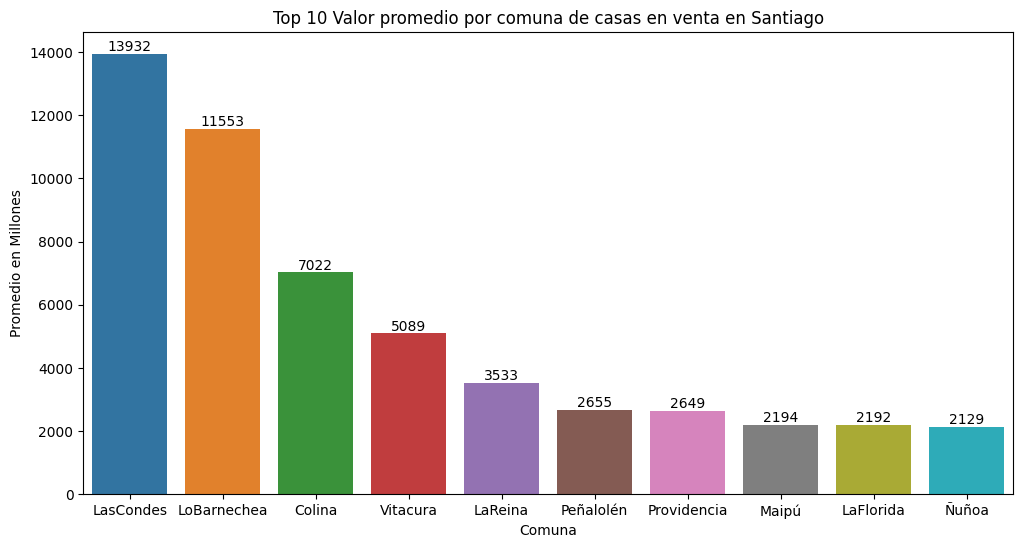

In [18]:
plt.figure(figsize=(12,6))
graphic_2 = sns.barplot(x='Comuna', y='precio_millon_clp', data=promedio_comuna.head(10))
graphic_2.set_title('Top 10 Valor promedio por comuna de casas en venta en Santiago')
plt.xlabel('Comuna')
plt.ylabel('Promedio en Millones')

for labels in graphic_2.patches:
    graphic_2.annotate(f'{int(labels.get_height())}', (labels.get_x() + labels.get_width() / 2., labels.get_height()),
                ha='center', va='bottom')

plt.show()

Realizamos el calculo del valor del metro cuadrado construido por comuna

In [19]:
data_comuna = data_casas.groupby('Comuna').sum()
data_comuna['Valor_m2_Comuna'] = data_comuna['precio_millon_clp']/data_comuna['area_construida']
data_comuna.reset_index(inplace=True)
data_comuna.head()

,Comuna,precio_millon_clp,precio_mil_uf,precio_mil_usd,banos,dormitorios,area_construida,area_total,Valor_m2_Comuna
0,Alhué,793.74,22.00,967.97,5.00,6.00,320.00,1000.00,2.48
1,Buin,35969.42,996.97,43865.15,432.00,596.00,19810.00,76213.00,1.82
2,CaleradeTango,14329.31,397.16,17474.77,115.00,132.00,23610.00,130447.00,0.61
3,Cerrillos,12276.00,340.25,14970.73,145.00,283.00,128453.00,314530.00,0.10
4,CerroNavia,7608.91,210.89,9279.16,108.00,240.00,7261.00,12521.00,1.05


Mapeamos los resultados al dataframe principal

In [20]:
data_comuna.set_index('Comuna', inplace=True)
m2_comuna = dict(data_comuna['Valor_m2_Comuna'])

Creamos nuevas variables numericas a partir de los datos existentes

In [21]:
data_casas['Valor_m2_Comuna'] = data_casas['Comuna']
data_casas['Valor_m2_Comuna'] = data_casas['Valor_m2_Comuna'].map(m2_comuna)
data_casas['Valor_m2_Millon'] = data_casas['precio_millon_clp']/data_casas['area_construida']

<ipython-input-21-8be3371a3116>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_casas['Valor_m2_Comuna'] = data_casas['Comuna']
<ipython-input-21-8be3371a3116>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_casas['Valor_m2_Comuna'] = data_casas['Valor_m2_Comuna'].map(m2_comuna)
<ipython-input-21-8be3371a3116>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

Realizamos filtrado por comuna y organizamos el top 10 con mayor cuenta de valores

In [22]:
top_comunas = data_casas['Comuna'].value_counts()[:10].index

Visualizamos nuevos datos con boxplot para poder verificar claramente el comportamiento de casas por comuna

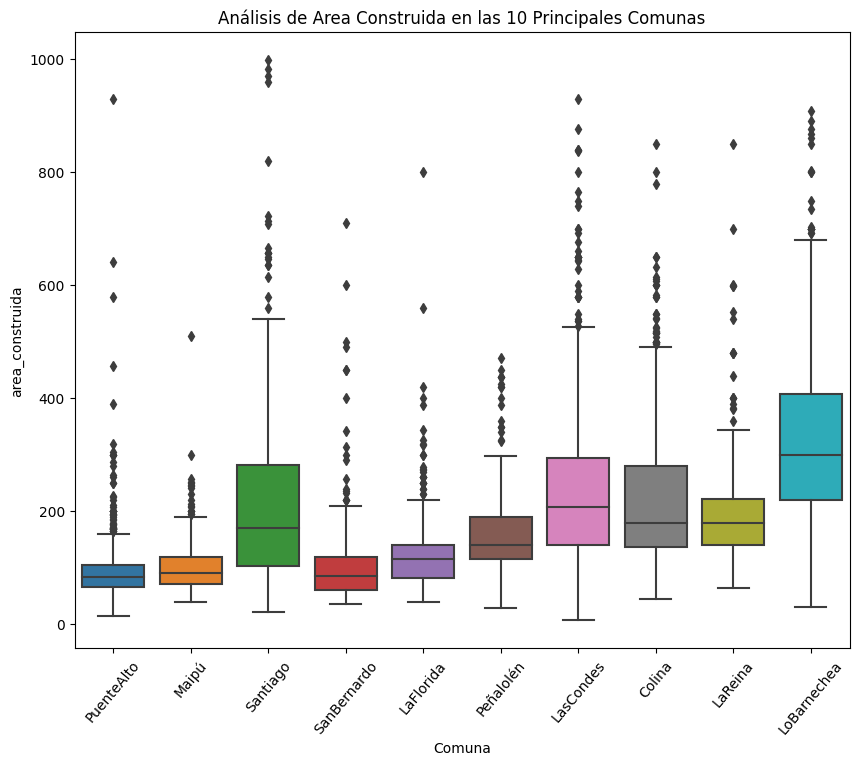

In [23]:
plt.figure(figsize = (10,8))
ax = sns.boxplot(x = 'Comuna', y = 'area_construida', data = data_casas.query('Comuna in @top_comunas & area_construida < 1000'))
ax.set_title('Análisis de Area Construida en las 10 Principales Comunas')
ax.tick_params(axis='x', rotation=50)
plt.show()

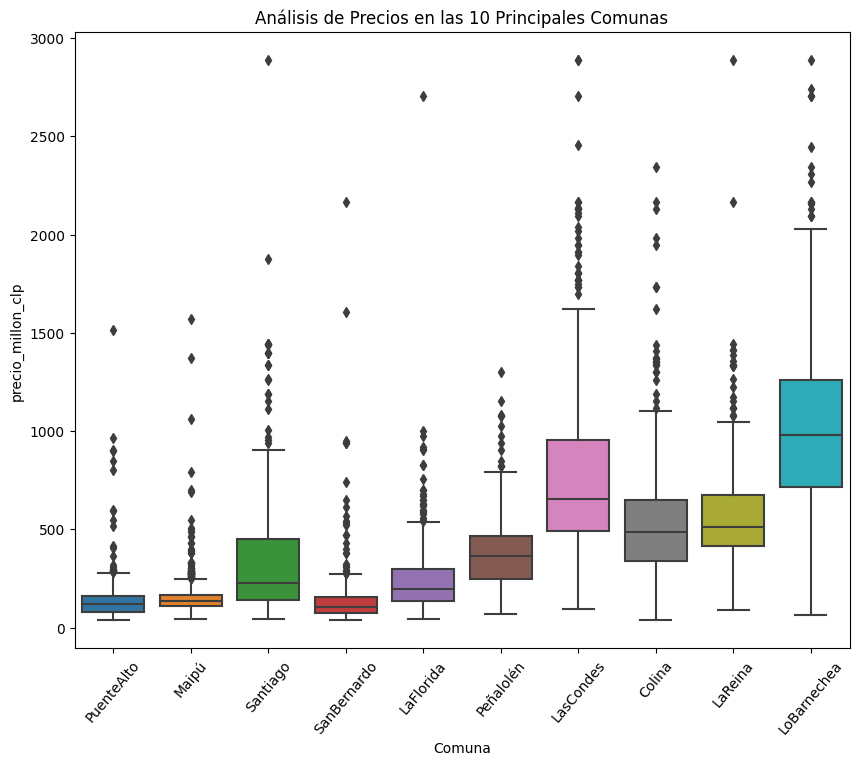

In [24]:
plt.figure(figsize = (10,8))
ax = sns.boxplot(x = 'Comuna', y = 'precio_millon_clp', data = data_casas.query('Comuna in @top_comunas & precio_millon_clp < 3000'))
ax.set_title('Análisis de Precios en las 10 Principales Comunas')
ax.tick_params(axis='x', rotation=50)
plt.show()

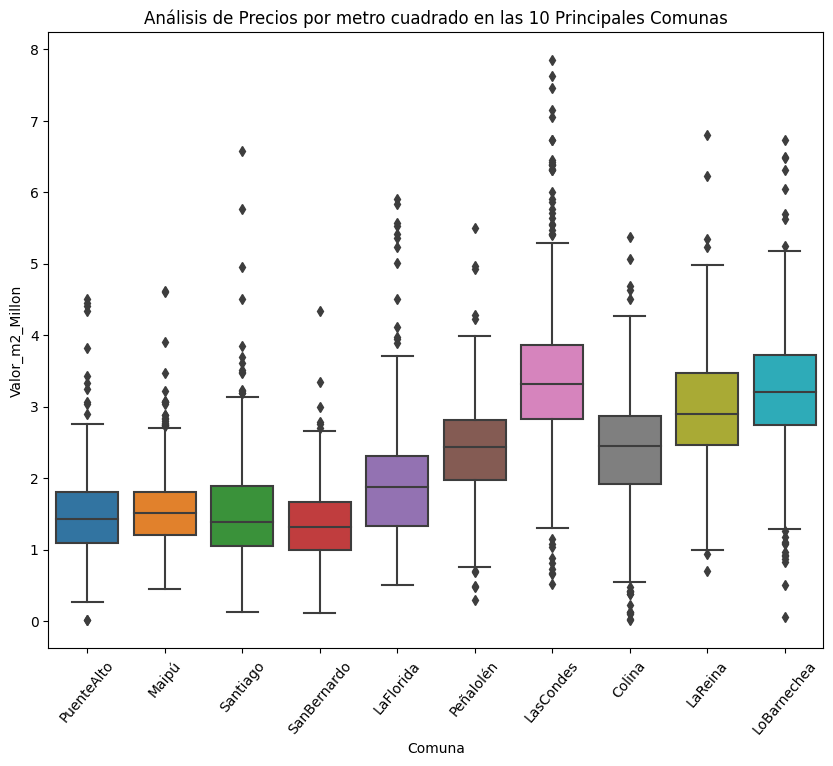

In [25]:
plt.figure(figsize = (10,8))
ax = sns.boxplot(x = 'Comuna', y = 'Valor_m2_Millon', data = data_casas.query('Valor_m2_Millon < 8 & Comuna in @top_comunas'))
ax.set_title('Análisis de Precios por metro cuadrado en las 10 Principales Comunas')
ax.tick_params(axis='x', rotation=50)
plt.show()

Ejemplo comuna Las Condes:

*Resumen Estadístico*

**Mediana**: El precio medio por metro cuadrado en la Comuna Las Condes es de aproximandamente  3 millones de CLP. Esto representa el valor "típico" de una propiedad en esta comuna.

**Rango Intercuartil (IQR)**: El 50% de las propiedades en la Comuna Las Condes tienen un precio entre aproximadamente 3 y 4 millones de CLP por metro cuadrado. Esto sugiere una relativa homogeneidad en los precios dentro de este rango.

**Bigotes**: Los precios más bajos y más altos dentro de un rango aceptable son de aproximadamente 1,5 y 5 millones de CLP respectivamente. Estos valores demuestran la variabilidad de los precios en la Comuna Las Condes.

**Outliers**: Hay algunas propiedades que se venden aproximadamente por 1 millón de CLP y 8 millones de CLP, que son excepcionalmente bajos y altos respectivamente. Estos valores atípicos podrían ser de interés para una investigación más detallada, ya que pueden indicar propiedades que ofrecen características únicas o condiciones de venta inusuales.

*Implicaciones y Sugerencias*

**Para Compradores**: Si estás buscando una propiedad a un precio más asequible, podrías encontrar opciones por debajo de la mediana, cercanas a los 3 millones de CLP por metro cuadrado.

**Para Vendedores**: Si tu propiedad está en el rango de 3,5 y 5 millones de CLP por metro cuadrado, está en el extremo más alto del mercado en la Comuna Las Condes, y deberías justificar este precio con características adicionales o beneficios.

**Para Inversionistas**: Las propiedades que se consideran outliers podrían merecer una investigación adicional para entender por qué están valoradas tan por debajo o por encima del mercado.

Construimos diccionario de comunas para poder cruzar con nuestro dataset del INE

In [26]:
comunas_censo = {
    13101: "Santiago",
    13102: "Cerrillos",
    13103: "Cerro Navia",
    13104: "Conchalí",
    13105: "El Bosque",
    13106: "Estación Central",
    13107: "Huechuraba",
    13108: "Independencia",
    13109: "La Cisterna",
    13110: "La Florida",
    13111: "La Granja",
    13112: "La Pintana",
    13113: "La Reina",
    13114: "Las Condes",
    13115: "Lo Barnechea",
    13116: "Lo Espejo",
    13117: "Lo Prado",
    13118: "Macul",
    13119: "Maipú",
    13120: "Ñuñoa",
    13121: "Pedro Aguirre Cerda",
    13122: "Peñalolén",
    13123: "Providencia",
    13124: "Pudahuel",
    13125: "Quilicura",
    13126: "Quinta Normal",
    13127: "Recoleta",
    13128: "Renca",
    13129: "San Joaquín",
    13130: "San Miguel",
    13131: "San Ramón",
    13132: "Vitacura",
    13201: "Puente Alto",
    13202: "Pirque",
    13203: "San José de Maipo",
    13301: "Colina",
    13302: "Lampa",
    13303: "Tiltil",
    13401: "San Bernardo",
    13402: "Buin",
    13403: "Calera de Tango",
    13404: "Paine",
    13501: "Melipilla",
    13502: "Alhué",
    13503: "Curacaví",
    13504: "María Pinto",
    13505: "San Pedro",
    13601: "Talagante",
    13602: "El Monte",
    13603: "Isla de Maipo",
    13604: "Padre Hurtado",
    13605: "Peñaflor"
}

Indice de preguntas del censo:

1- indique el tipo de vivienda
2- Estado de la vivienda(Ocupada, descopuada, en venta, vacacional)
3-


In [27]:
viviendas_santiago['Nombre_comuna'] = viviendas_santiago['COMUNA'].map(comunas_censo)

NameError: ignored

In [ ]:
viviendas_santiago

In [ ]:
mapa_respuestasP02 = {1: 1, 2: 0, 3: 0, 4: 0}
viviendas_santiago['OCUPADA'] = viviendas_santiago['P02'].map(mapa_respuestasP02)
viviendas_santiago

In [ ]:
mapa_respuestasP02 = {1: 1, 2: 0, 3: 0, 4: 0}
viviendas_santiago['OCUPADA'] = viviendas_santiago['P02'].map(mapa_respuestasP02)
viviendas_santiago

In [ ]:
mapa_respuestasP02 = {1: 0, 2: 0, 3: 1, 4: 0}
viviendas_santiago['EN_VENTA'] = viviendas_santiago['P02'].map(mapa_respuestasP02)
viviendas_santiago